# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Reading csv**

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target", axis= 1)
y= heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [4]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [5]:
np.mean(cross_val_score)

0.8248087431693989

# **Area under the receiver oparating charactaristic curve (AUC/ROC)**


*   Area under curve (AUC)
*   ROC curve

**ROC curve is a comparison of a model's true positive rate (tpr) VS a model's false positive rate (fpr)**

*   True positive - model predict 1 and the truth is 1
*   False positive - model predict 1 and the truth is 0
*   True negative - model predict 0 and the truth is 0
*   False negative - model predict 0 and the truth is 1






In [6]:
# spliting into train and test set and fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# make prediction with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [8]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [9]:
# importing roc_curve library
from sklearn.metrics import roc_curve

# Claculating fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)


In [10]:
# check the false positive
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [11]:
# creating a function for plotting a ROC curve
def plot_roc_curve(fpr, tpr):
  #plot ROC curve
  plt.plot(fpr, tpr, color='orange', label= 'ROC')

  #plot line with no predictive power (baseline)
  plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle = '--', label= 'Guessing')

  # customizing the plot
  plt.xlabel("False Positive Rate (fpr)")
  plt.ylabel("Talse Positive Rate (tpr)")
  plt.title("Receiver Operating Characteristics (ROC) Curve")
  plt.legend()
  plt.show()

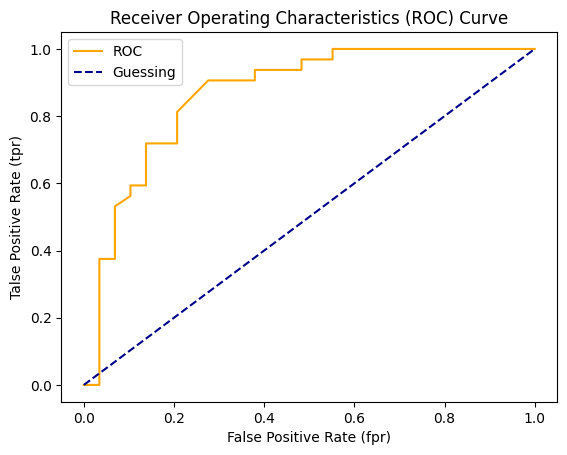

In [12]:
# Calling the function
plot_roc_curve(fpr, tpr)

In [13]:
#AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

# **Confusion Matrix**
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you the idea where the model is getting confused.

In [14]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

<Axes: >

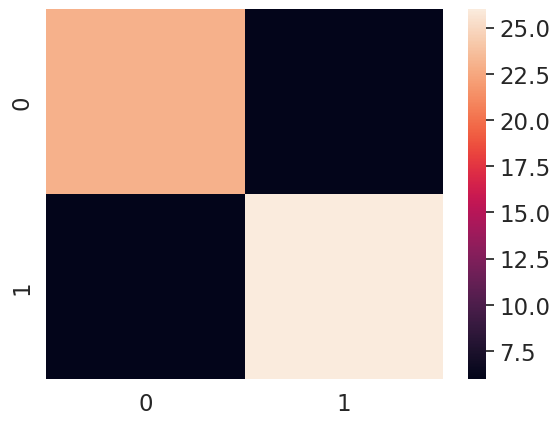

In [15]:
# vitualizing the confusion matrix with seaborn
import seaborn as sns

#Set the font scale
sns.set(font_scale= 1.5)

#Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plotting
sns.heatmap(conf_mat)

# **Classification Report**

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [17]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predict every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict= True))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000
